# FEATURE EXTRACTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
X = digits.data
y = digits.target
df = pd.DataFrame(X)
df['y'] = y

In [5]:
# plt.imshow(df.loc[10, np.arange(0,64)].values.reshape(8, 8), cmap='gray_r')

In [6]:
def plot_digit(number,df):
    plt.imshow(df.loc[number, np.arange(0,64)].values.reshape(8, 8), cmap='gray_r')
    plt.title("Label:"+str(df.loc[number, 'y']))
    plt.colorbar()
    plt.show()
    return None

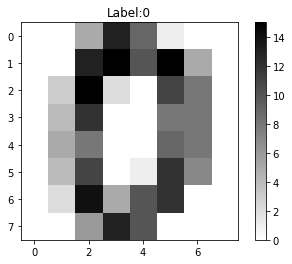

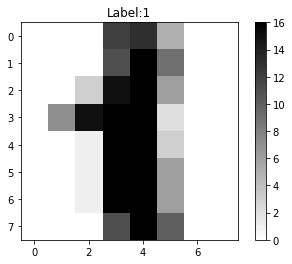

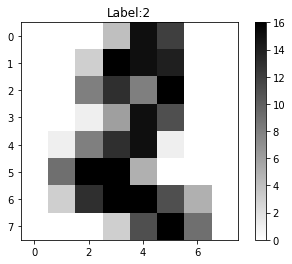

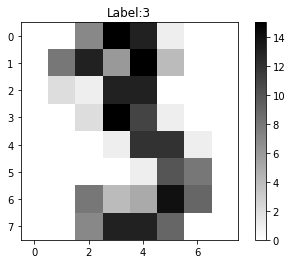

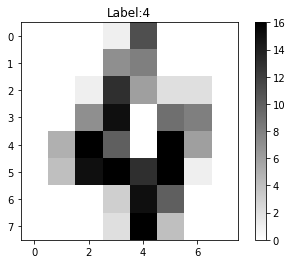

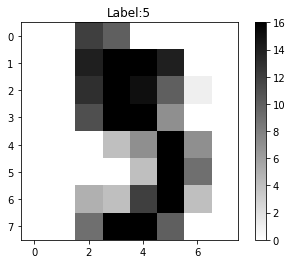

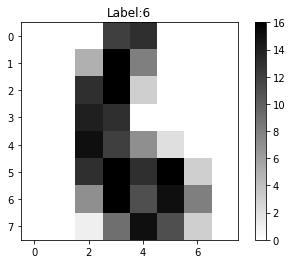

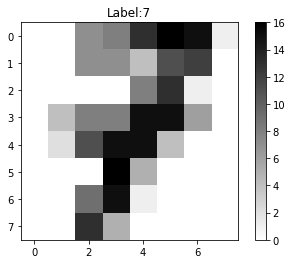

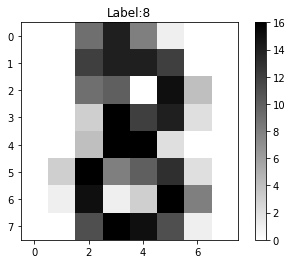

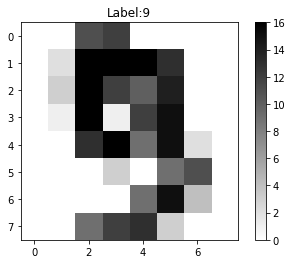

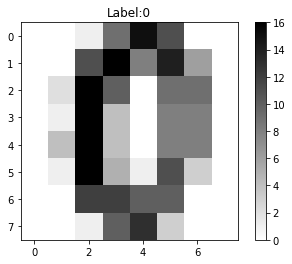

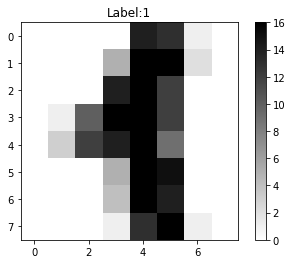

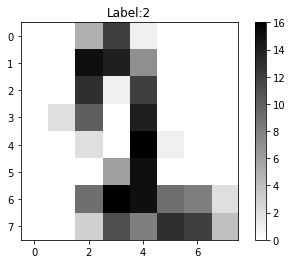

In [7]:
for i in range(13): 
    plot_digit(i,df)

## Két ábra a magyarázatokhoz


### PCA
<img src="pca.jpg" width="600" >

### TSNE
<img src="tsne.jpg" width="600" >

# PCA

In [9]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(n_components=64)

In [20]:
pca.fit(X)

PCA(n_components=64)

In [21]:
pca.explained_variance_

array([1.79006930e+02, 1.63717747e+02, 1.41788439e+02, 1.01100375e+02,
       6.95131656e+01, 5.91085249e+01, 5.18845391e+01, 4.40151067e+01,
       4.03109953e+01, 3.70117984e+01, 2.85190412e+01, 2.73211698e+01,
       2.19014881e+01, 2.13243565e+01, 1.76367222e+01, 1.69468639e+01,
       1.58513899e+01, 1.50044602e+01, 1.22344732e+01, 1.08868593e+01,
       1.06935663e+01, 9.58259779e+00, 9.22640260e+00, 8.69036872e+00,
       8.36561190e+00, 7.16577961e+00, 6.91973881e+00, 6.19295508e+00,
       5.88499123e+00, 5.15586690e+00, 4.49129656e+00, 4.24687799e+00,
       4.04743883e+00, 3.94340334e+00, 3.70647245e+00, 3.53165306e+00,
       3.08457409e+00, 2.73780002e+00, 2.67210896e+00, 2.54170563e+00,
       2.28298744e+00, 1.90724229e+00, 1.81716569e+00, 1.68996439e+00,
       1.40197220e+00, 1.29221888e+00, 1.15893419e+00, 9.31220008e-01,
       6.69850594e-01, 4.86065217e-01, 2.52350432e-01, 9.91527944e-02,
       6.31307848e-02, 6.07377581e-02, 3.96662297e-02, 1.49505636e-02,
      

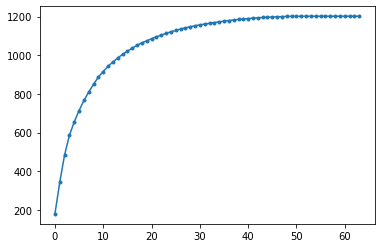

In [22]:
plt.plot(pca.explained_variance_.cumsum(),marker='.')

In [23]:
pca = PCA(n_components=2)
pca.fit(X)
pca_matrix=pca.transform(X)
df.loc[:,['pca0','pca1']]=pca_matrix

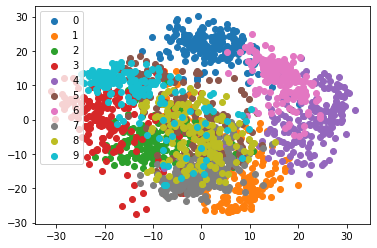

In [26]:
for digit in range(0,10):
    plt.scatter(df.loc[df['y']==digit,'pca0'],
                df.loc[df['y']==digit,'pca1'],
               label=str(digit))
plt.legend()
    

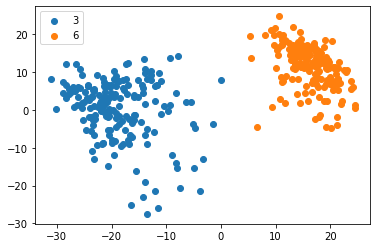

In [28]:
for digit in [3,6]:
    plt.scatter(df.loc[df['y']==digit,'pca0'],
                df.loc[df['y']==digit,'pca1'],
               label=str(digit))
plt.legend()

# Új dimenziók KMeans algoritmussal

In [29]:
from sklearn.cluster import KMeans

In [47]:
k=10
kmeas = KMeans(random_state=42,n_clusters=k)
ujnevek=[]
for i in range(k):
    df['kmeans_c_'+str(i)]=0
    ujnevek.append('kmeans_c_'+str(i))


In [48]:
df[ujnevek]=kmeas.fit_transform(df.iloc[:,:64])

In [49]:
df[ujnevek].head(3)

,kmeans_c_0,kmeans_c_1,kmeans_c_2,kmeans_c_3,kmeans_c_4,kmeans_c_5,kmeans_c_6,kmeans_c_7,kmeans_c_8,kmeans_c_9
0,14.002706,32.334181,46.293225,44.675258,41.742849,44.766536,40.748910,39.458838,42.976820,38.983049
1,54.076429,44.496078,38.271285,36.366910,44.373336,25.149644,39.201426,41.181043,40.021295,43.478752
2,47.752128,45.643658,40.165655,39.862789,43.335309,30.993528,43.926112,50.296552,41.328164,45.645629


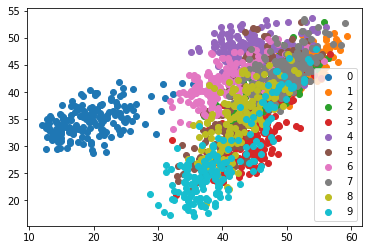

In [50]:
for digit in range(10):
    plt.scatter(df.loc[df['y']==digit,'kmeans_c_0'],
                df.loc[df['y']==digit,'kmeans_c_1'],
               label=str(digit))
plt.legend()

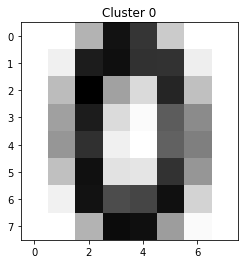

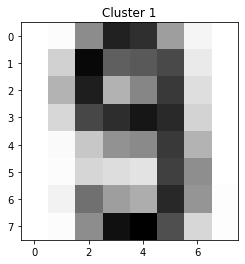

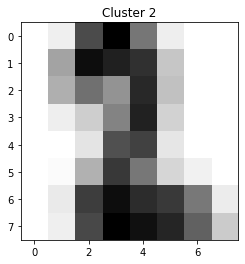

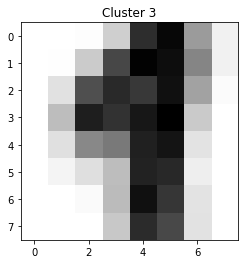

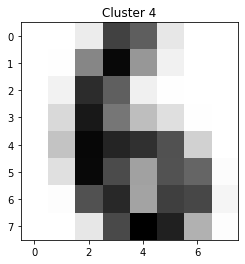

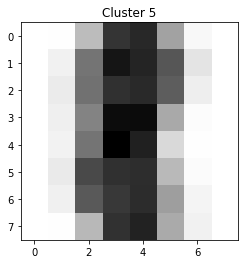

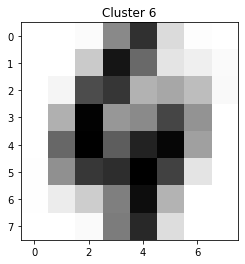

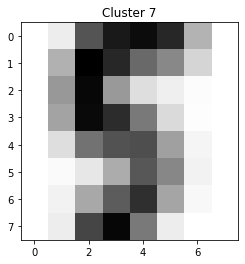

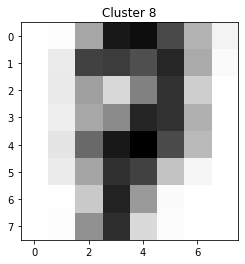

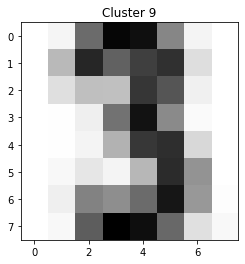

In [51]:
for i in range(kmeas.n_clusters):
    plt.title("Cluster "+str(i))
    plt.imshow(kmeas.cluster_centers_[i].reshape(8,8),cmap='gray_r')
    plt.show()

In [52]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,kmeans_c_0,kmeans_c_1,kmeans_c_2,kmeans_c_3,kmeans_c_4,kmeans_c_5,kmeans_c_6,kmeans_c_7,kmeans_c_8,kmeans_c_9
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,42.524406,38.448547,41.818670,43.670935,42.691046,38.993548,43.083520,40.843787,41.385355,40.348172
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,9.467073,7.697436,7.789109,6.770264,8.830897,6.620487,8.039364,6.353770,7.326026,8.430940
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.984292,17.126557,15.661594,18.414200,12.720304,15.212476,15.268611,17.494398,15.279120,15.576002
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.296080,33.109222,38.022472,39.912163,39.236303,35.650680,39.177796,38.190489,37.897083,35.280466
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,44.258671,39.955909,42.374046,43.960106,43.970064,40.123661,43.751724,41.773843,42.429704,41.599295
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,48.611938,44.449263,46.599262,47.886357,48.544684,43.504576,48.990583,44.736616,46.546024,46.287758
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,59.281243,53.573751,61.221937,60.667050,64.011963,55.336619,60.082589,58.643448,56.765217,56.985010


# t-SNE (t-Distributed Stochastic Neighbor Embedding)

(Nem is annyira kellene tanítani :) ) 

<img src='tsne.jpg' width='600'>

In [53]:
from sklearn.manifold import TSNE

In [54]:
tsne = TSNE(random_state=42, n_components=2)

In [55]:
tsne_matrix = tsne.fit_transform(X)

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [56]:
df.loc[:,['tsne0','tsne1']]=tsne_matrix

In [57]:
def ketDrajzolo(df,v1,v2):
    plt.xlabel(v1)
    plt.ylabel(v2)
    for digit in range(10):
        plt.scatter(df.loc[df['y']==digit,v1],
                    df.loc[df['y']==digit,v2],
                   label=str(digit))
    plt.legend()

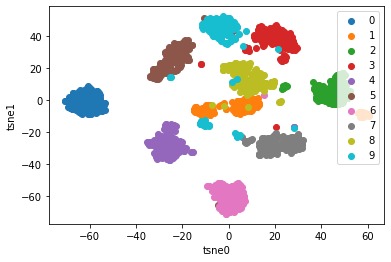

In [58]:
ketDrajzolo(df,'tsne0','tsne1')

In [59]:
kilencesek=df[df['y']==9].copy()

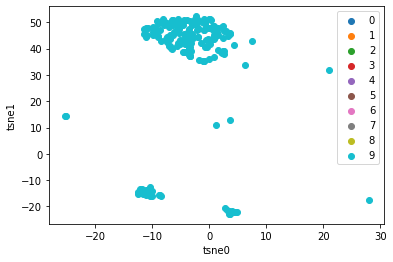

In [60]:
ketDrajzolo(kilencesek,'tsne0','tsne1')

In [63]:
csopi=kilencesek[(kilencesek['tsne0']<0)&(kilencesek['tsne1']<0)]

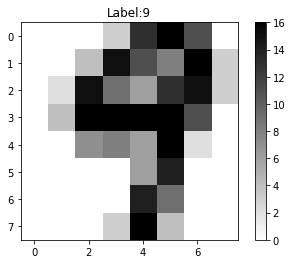

In [66]:
plot_digit(2,csopi.reset_index(drop=True))

In [67]:
csopi2=kilencesek[(kilencesek['tsne1']>30)]

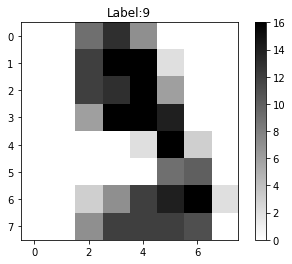

In [71]:
plot_digit(2,csopi2.reset_index(drop=True))

In [72]:
# UMAP (Uniform Manifold Approximation and Projection)

In [76]:
# import umap
# Nincs fent :(

# SVD - Singural Value Decomposition

In [78]:
from sklearn.decomposition import TruncatedSVD

In [79]:
svd = TruncatedSVD(n_components=2)

In [80]:
df.loc[:,['svd0','svd1']]=svd.fit_transform(X)

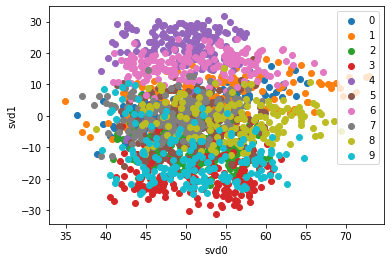

In [82]:
ketDrajzolo(df,'svd0','svd1')

# Melyik hogy segiti a modellezest?

In [87]:
extra = ['pca0',       'pca1', 'kmeans_c_0', 'kmeans_c_1', 'kmeans_c_2',
       'kmeans_c_3', 'kmeans_c_4', 'kmeans_c_5', 'kmeans_c_6', 'kmeans_c_7',
       'kmeans_c_8', 'kmeans_c_9',      'tsne0',      'tsne1',       'svd0',
             'svd1']

In [88]:
len(df)

1797

### Kérdés:
- Első 1000 tanul, maradék tesztel - ROC AUC
- Adott modell + paraméterezés
- Első 64, Extrák vagy egyben az összes

In [93]:
cdigit = 5

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
from sklearn.metrics import roc_auc_score

In [96]:
df['target']=(df['y']==cdigit)+0

In [98]:
df['target'].mean()

0.10127991096271564

In [99]:
model = GradientBoostingClassifier(random_state=42,n_estimators=160,
                                  max_depth=4,min_samples_leaf=10)

In [100]:
alap=list(df.columns)[:64]

In [105]:
for cdigit in range(0,10):
    df['target']=(df['y']==cdigit)+0
    train_df=df.iloc[:1000,:]
    test_df =df.iloc[1000:,:].copy()
    for valtozok in [alap,extra,alap+extra]:
        model.fit(train_df[valtozok],train_df['target'])
        pred = model.predict_proba(test_df[valtozok])[:,1]
        auc =roc_auc_score(test_df['target'],pred)
        print(cdigit,len(valtozok),"->",auc)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0 64 -> 0.9985543528084341
0 16 -> 1.0


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0 80 -> 1.0


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


1 64 -> 0.9792189679218969
1 16 -> 0.9970536959553696


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


1 80 -> 0.9920153417015342


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


2 64 -> 0.9978174603174603
2 16 -> 1.0


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


2 80 -> 1.0


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


3 64 -> 0.9701174147597053
3 16 -> 0.9680194633475547


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


3 80 -> 0.9743573921935053


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


4 64 -> 0.9957476966690291
4 16 -> 0.9864162532482873


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


4 80 -> 0.9905757483716379


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


5 64 -> 0.9941838649155723
5 16 -> 0.9962817670134743


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


5 80 -> 0.9987378475183353


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


6 64 -> 0.9985529986052999
6 16 -> 0.9998953974895397


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


6 80 -> 0.9999825662482567


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


7 64 -> 0.9992154811715482
7 16 -> 0.9996513249651324


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


7 80 -> 0.9994769874476988


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


8 64 -> 0.9885575589459085
8 16 -> 0.9934849259070005


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


8 80 -> 0.9933571793561574


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


9 64 -> 0.9862749155114146
9 16 -> 0.9797572246361818


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


9 80 -> 0.9842058072970549


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [106]:
for cdigit in [5]:
    df['target']=(df['y']==cdigit)+0
    train_df=df.iloc[:1000,:]
    test_df =df.iloc[1000:,:].copy()
    for valtozok in [alap,extra,alap+extra]:
        model.fit(train_df[valtozok],train_df['target'])
        pred = model.predict_proba(test_df[valtozok])[:,1]
        auc =roc_auc_score(test_df['target'],pred)
        print("digit:",cdigit,"len(bemenovaltozok):",len(valtozok),"-> AUC:",auc)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


digit: 5 len(bemenovaltozok): 64 -> AUC: 0.9941838649155723
digit: 5 len(bemenovaltozok): 16 -> AUC: 0.9962817670134743


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


digit: 5 len(bemenovaltozok): 80 -> AUC: 0.9987378475183353


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [108]:
imp = pd.DataFrame({"att":alap+extra,"imp":model.feature_importances_})

In [112]:
imp.sort_values('imp',ascending=False).head(20)

,att,imp
73,kmeans_c_7,0.781892
76,tsne0,0.146118
77,tsne1,0.039845
71,kmeans_c_5,0.007370
22,22,0.004730
21,21,0.004152
19,19,0.003909
74,kmeans_c_8,0.002922
65,pca1,0.002298
52,52,0.001547


In [114]:
# Partial Dependence Plot - PDP

In [115]:
from sklearn.inspection import plot_partial_dependence

In [118]:
nev = 'kmeans_c_7'
nevek = alap+extra
for j,i in enumerate(nevek):
    if i == nev:
        break
print(j)
        

73


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


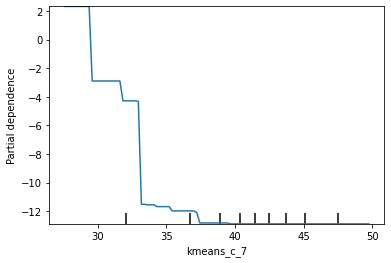

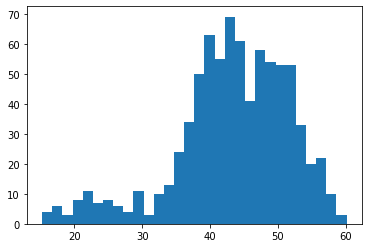

In [122]:
plot_partial_dependence(model,test_df[alap+extra],[73],feature_names=alap+extra)
plt.show()
_ = plt.hist(test_df.iloc[:,73],bins=30)

In [123]:
# Ha igazan latni akarsz valamit

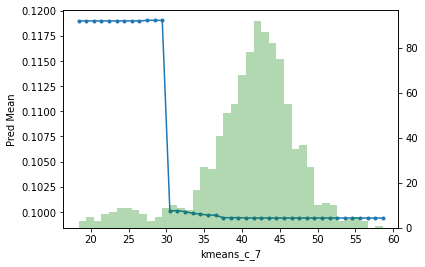

In [144]:
def mypdp(model,df,valtozo,bemeno_valtozok,stepnum=40):
    mydf=df.copy()
    minX = mydf[valtozo].min()
    maxX = mydf[valtozo].max()
    stepsize=(maxX-minX)/stepnum
    x_t=[]
    y_t=[]
    for current_value in np.arange(minX,maxX+stepsize,stepsize):
        mydf[valtozo]=current_value
        pred = model.predict_proba(mydf[bemeno_valtozok])[:,1]
        x_t.append(current_value)
        y_t.append(np.mean(pred))
    ax1 = plt.subplot()
    ax1.set_xlabel(valtozo)
    ax1.set_ylabel("Pred Mean")
    ax1.plot(x_t,y_t,marker='.')
    ax2=ax1.twinx()
    ax2=plt.hist(df[valtozo],bins=stepnum,color='green',alpha=0.3)

mypdp(model,train_df,'kmeans_c_7',alap+extra)

In [140]:
import warnings
warnings.filterwarnings("ignore")

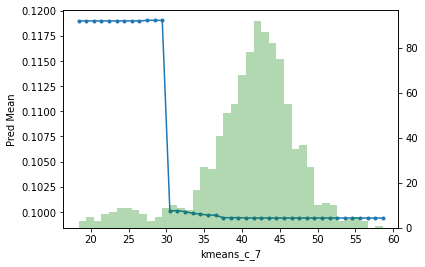

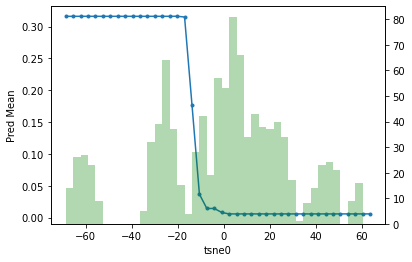

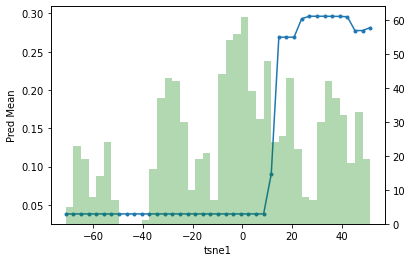

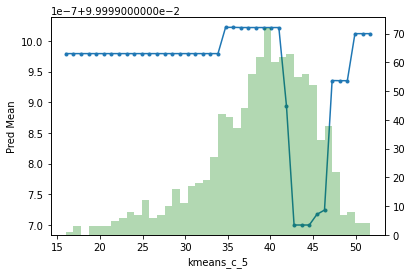

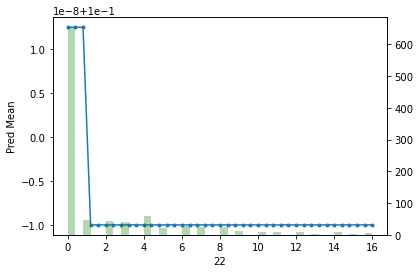

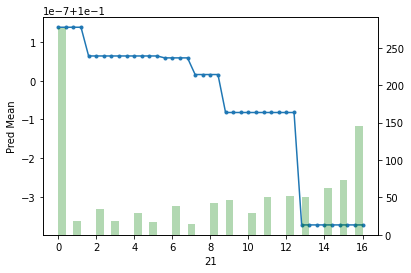

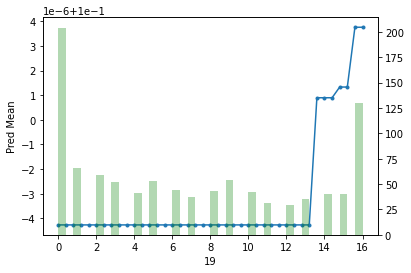

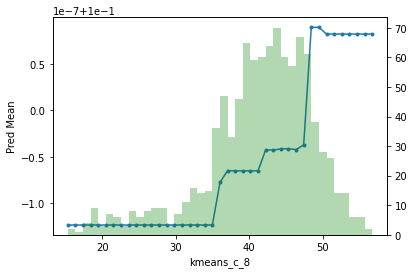

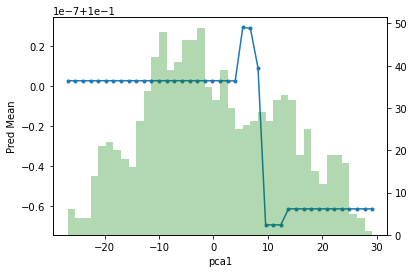

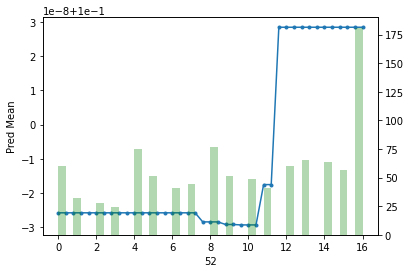

In [145]:
for v in imp.sort_values('imp',ascending=False).head(10)['att'].values:
    mypdp(model,train_df,v,alap+extra)
    plt.show()


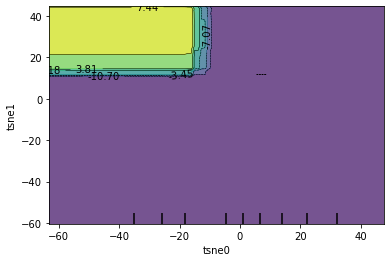

In [147]:
plot_partial_dependence(model,test_df[alap+extra],[ (76,77) ],feature_names=alap+extra)
